# Backward Euler Method

Links:
* https://scicomp.stackexchange.com/questions/5042/how-to-implement-newtons-method-for-solving-the-algebraic-equations-in-the-back/5045#5045  -  How to implement Newton's method for solving the algebraic equations in the backward Euler method
* https://scicomp.stackexchange.com/questions/33701/understanding-butcher-tableau-when-it-comes-to-implicit-methods  -  Understanding butcher tableau when it comes to implicit methods
* https://stackoverflow.com/questions/70794806/explicit-forward-and-implicit-backward-euler-methods-in-python  -  Explicit (Forward) and Implicit (Backward) Euler Methods in Python
* https://math.libretexts.org/Bookshelves/Differential_Equations/Numerically_Solving_Ordinary_Differential_Equations_(Brorson)/01%3A_Chapters/1.03%3A_Backward_Euler_method  -  Backward Euler algorithm
* https://math.stackexchange.com/questions/152159/how-to-correctly-apply-newton-raphson-method-to-backward-euler-method
* https://se.mathworks.com/matlabcentral/answers/1714925-newton-raphson-for-backwards-euler-on-system-of-differential-equations

Take the general form of a first order differential equation (ODE).
$$
\frac{dy(t)}{dt} = f(t,y(t)) ~~ or ~~ y' = f(f,y)
$$
That has the initial condition $y(t_0) = y_0$.

Discretizing the derivative $\frac{dy(t)}{dt}$ to numerically approximate the ODE with a backwards stepping its approximation is as follows
$$
\frac{dy(t)}{dt} = \frac{y_n - y_{n-1}}{\Delta t}
$$
Substituting the backwards step derivative approximation into the ODE yields the following
$$
\frac{y_n - y_{n-1}}{\Delta t} = f(t_n,y_n)
$$
The equation can be re-written to
$$
y_n= y_{n-1} + \Delta t f(t_n,y_n)
$$
Then, by shifting the equation, in positive step direction, and substituting $\Delta t$ with $h$, the Backwards Euler formula is derived
$$
y_{n+1} = y_{n} + hf(t_{n+1},y_{n+1})
$$

Re-writing the equation above to
$$
y_{n+1} - y_{n} - hf(t_{n+1},y_{n+1}) = 0
$$

Thus, $y_{n+1}$ is a zero of $g(x)$, where
$$
g(x) = 0 = x - y_n - hf(t_{n+1},x)
$$
Applying Netwon Rapshon method
$$
g'(x) = 0 = 1 - h \frac{\partial f}{\partial y}(t_{n+1},z)
$$
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

Knowing $y_n$, set $z_0 = y_n$ for the iteration for convergance

$$
x_{n+1} = x_k - \frac{g(x)}{g'(x)}
$$

The result from the numerical zero solution $z_n$ is then used as the evaluated $y_{n+1}$


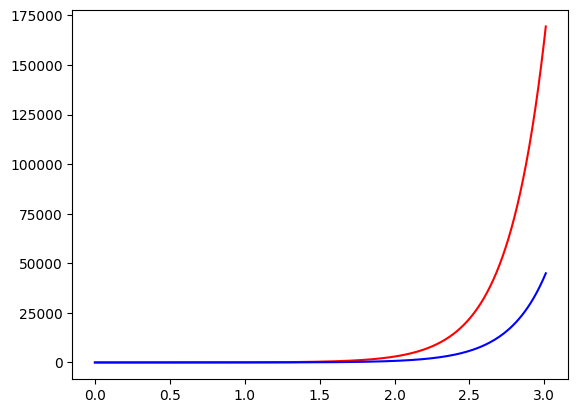

In [79]:
from math import exp
import matplotlib.pyplot as plt

def create_time_span(t_start, t_end, step_size):
    time_span = []
    time_c = t_start
    while time_c <= t_end:
        time_span.append(time_c)
        time_c += step_size
    time_span.append(time_c)
    return time_span


dt = 0.01
T = 3

time = create_time_span(0, T, dt)

x_exact = []
x_sim = []

# ODE: y'(t) = 4*y(t)
# exact: y(t) = e^(4t)

for i, t in enumerate(time):
    if i == 0:
        x_sim.append(0)
        x_exact.append(exp(4 * t))
    else:
        x_exact.append(exp(4 * t))
        x = x_sim[i-1]
        x_ = x
        for k in range(1000):
            g = x - x_ - dt*exp(4*(t+dt))
            g_prime = 1 - 0
            x_new = x - g/g_prime
            if x == x_new:
                #print(f"converged at step {i} at iteration {k}")
                break
            x = x_new

        x_sim.append(x)

fig, ax = plt.subplots()
ax.plot(time, x_exact, color='r')
ax.plot(time, x_sim, color='b')

plt.show()